#  IS 362 - Data Acquisiton and Management 

Professor Charles Pak

Angela Hernandez

Assignment 7

3/7/24

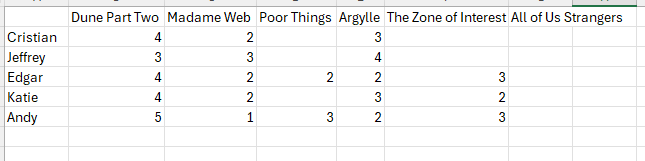

Choose six recent popular movies. Ask at least five people that you know (friends, family, classmates,
imaginary friends) to rate each of these movies that they have seen on a scale of 1 to 5. There should be
at least one movie that not everyone has seen!

Take the results (observations) and store them somewhere (like a SQL database, or a .CSV file). Load the
information into a pandas dataframe. Your solution should include Python and pandas code that
accomplishes the following:

    1. Load the ratings by user information that you collected into a pandas dataframe.
    2. Show the average ratings for each user and each movie.
    3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average
    ratings for each user and each movie.
    4. Provide a text-based conclusion: explain what might be advantages and disadvantages of using
    normalized ratings instead of the actual ratings.
    5. [Extra credit] Create another new pandas dataframe, with standardized ratings for each user.
    Once again, show the average ratings for each user and each movie.

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [52]:
movies_df = pd.read_csv("C:/Users/Jessie/Documents/IS 362/movies.csv")

In [53]:
print(movies_df.head())

  Unnamed: 0  Dune Part Two  Madame Web  Poor Things  Argylle  \
0   Cristian              4           2          NaN        3   
1    Jeffrey              3           3          NaN        4   
2      Edgar              4           2          2.0        2   
3      Katie              4           2          NaN        3   
4       Andy              5           1          3.0        2   

   The Zone of Interest  All of Us Strangers  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   3.0                  NaN  
3                   2.0                  NaN  
4                   3.0                  NaN  


In [54]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

In [55]:
user_avg_ratings = movies_df.set_index('Unnamed: 0').mean(axis=1)

In [56]:
movie_avg_ratings = movies_df.set_index('Unnamed: 0').mean()

In [57]:
normalized_data = movies_df.set_index('Unnamed: 0').apply(normalize, axis=1).reset_index()

In [58]:
normalized_user_avg_ratings = normalized_data.set_index('Unnamed: 0').mean(axis=1)

In [59]:
normalized_movie_avg_ratings = normalized_data.set_index('Unnamed: 0').mean()

In [60]:
print("Average ratings for each user:")
print(user_avg_ratings)

Average ratings for each user:
Unnamed: 0
Cristian    3.000000
Jeffrey     3.333333
Edgar       2.600000
Katie       2.750000
Andy        2.800000
dtype: float64


In [61]:
print("\nAverage ratings for each movie:")
print(movie_avg_ratings)


Average ratings for each movie:
Dune Part Two           4.000000
Madame Web              2.000000
Poor Things             2.500000
Argylle                 2.800000
The Zone of Interest    2.666667
All of Us Strangers          NaN
dtype: float64


In [62]:
print("\nNormalized average ratings for each user:")
print(normalized_user_avg_ratings)


Normalized average ratings for each user:
Unnamed: 0
Cristian    0.500000
Jeffrey     0.333333
Edgar       0.300000
Katie       0.375000
Andy        0.450000
dtype: float64


In [63]:
print("\nNormalized average ratings for each movie:")
print(normalized_movie_avg_ratings)


Normalized average ratings for each movie:
Dune Part Two           0.800000
Madame Web              0.000000
Poor Things             0.250000
Argylle                 0.450000
The Zone of Interest    0.333333
All of Us Strangers          NaN
dtype: float64


# Advantages

1. Fair Comparison: Normalization allows comparing ratings from different users on a similar scale, which is particularly useful when users have different ratings scales or tendencies.
2. Bias Mitigation: It helps in mitigating the bias that might arise due to different user rating behaviors.

# Disadvantages

1. Information Loss: Normalizing the data might lead to a loss of information, especially regarding how different the users' opinions are from one another.
2. Context Ignorance: Normalized ratings might not fully capture the context or the intensity of the users' preferences.

# Extra Credit

In [64]:
scaler = StandardScaler()

In [65]:
data_to_standardize = movies_df.set_index('Unnamed: 0').fillna(0)

In [66]:
standardized_data = scaler.fit_transform(data_to_standardize)

In [68]:
standardized_data_df = pd.DataFrame(standardized_data, index=movies_df['Unnamed: 0'], columns=data_to_standardize.columns)

In [69]:
standardized_user_avg_ratings = standardized_data_df.mean(axis=1)

In [70]:
standardized_movie_avg_ratings = standardized_data_df.mean(axis=1)

In [71]:
print("Standardized average ratings for each user:")
print(standardized_user_avg_ratings)

Standardized average ratings for each user:
Unnamed: 0
Cristian   -0.283807
Jeffrey    -0.061090
Edgar       0.125603
Katie      -0.038071
Andy        0.257365
dtype: float64


In [72]:
print("\nStandardized average ratings for each movie:")
print(standardized_movie_avg_ratings)


Standardized average ratings for each movie:
Unnamed: 0
Cristian   -0.283807
Jeffrey    -0.061090
Edgar       0.125603
Katie      -0.038071
Andy        0.257365
dtype: float64
